In [1]:
import pandas as pd
import os

#Lendo os dados do csv
csvPath = os.path.join("datasets", "traffic", "smart_mobility_dataset.csv")
traffic = pd.read_csv(csvPath)

In [2]:
#Mostrando as primeiras linhas do csv
traffic.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


In [3]:
#Mostrando as últimas linhas do csv
traffic.tail()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
4995,2024-03-18 08:15:00,40.604663,-73.831032,266,22.987611,12.670629,Green,Rain,0,0.698929,87,28,252.070807,7.511153,High
4996,2024-03-18 08:20:00,40.733790,-73.752213,20,75.736987,49.108556,Green,Snow,0,0.742800,5,0,203.563872,6.681980,Low
4997,2024-03-18 08:25:00,40.821354,-73.759376,43,59.492981,78.719110,Yellow,Clear,0,0.524574,94,16,71.660296,25.267246,Medium
4998,2024-03-18 08:30:00,40.772343,-73.836698,88,25.901119,64.690719,Yellow,Rain,0,-0.589902,73,5,442.692618,29.467326,Medium
4999,2024-03-18 08:35:00,40.756688,-73.849335,147,51.473769,28.048376,Green,Snow,0,0.569793,93,16,119.196815,25.065909,Medium


In [4]:
#Mostrando as informações dos dados
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               5000 non-null   object 
 1   Latitude                5000 non-null   float64
 2   Longitude               5000 non-null   float64
 3   Vehicle_Count           5000 non-null   int64  
 4   Traffic_Speed_kmh       5000 non-null   float64
 5   Road_Occupancy_%        5000 non-null   float64
 6   Traffic_Light_State     5000 non-null   object 
 7   Weather_Condition       5000 non-null   object 
 8   Accident_Report         5000 non-null   int64  
 9   Sentiment_Score         5000 non-null   float64
 10  Ride_Sharing_Demand     5000 non-null   int64  
 11  Parking_Availability    5000 non-null   int64  
 12  Emission_Levels_g_km    5000 non-null   float64
 13  Energy_Consumption_L_h  5000 non-null   float64
 14  Traffic_Condition       5000 non-null   

array([[<AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Vehicle_Count'}>],
       [<AxesSubplot: title={'center': 'Traffic_Speed_kmh'}>,
        <AxesSubplot: title={'center': 'Road_Occupancy_%'}>,
        <AxesSubplot: title={'center': 'Accident_Report'}>],
       [<AxesSubplot: title={'center': 'Sentiment_Score'}>,
        <AxesSubplot: title={'center': 'Ride_Sharing_Demand'}>,
        <AxesSubplot: title={'center': 'Parking_Availability'}>],
       [<AxesSubplot: title={'center': 'Emission_Levels_g_km'}>,
        <AxesSubplot: title={'center': 'Energy_Consumption_L_h'}>,
        <AxesSubplot: >]], dtype=object)

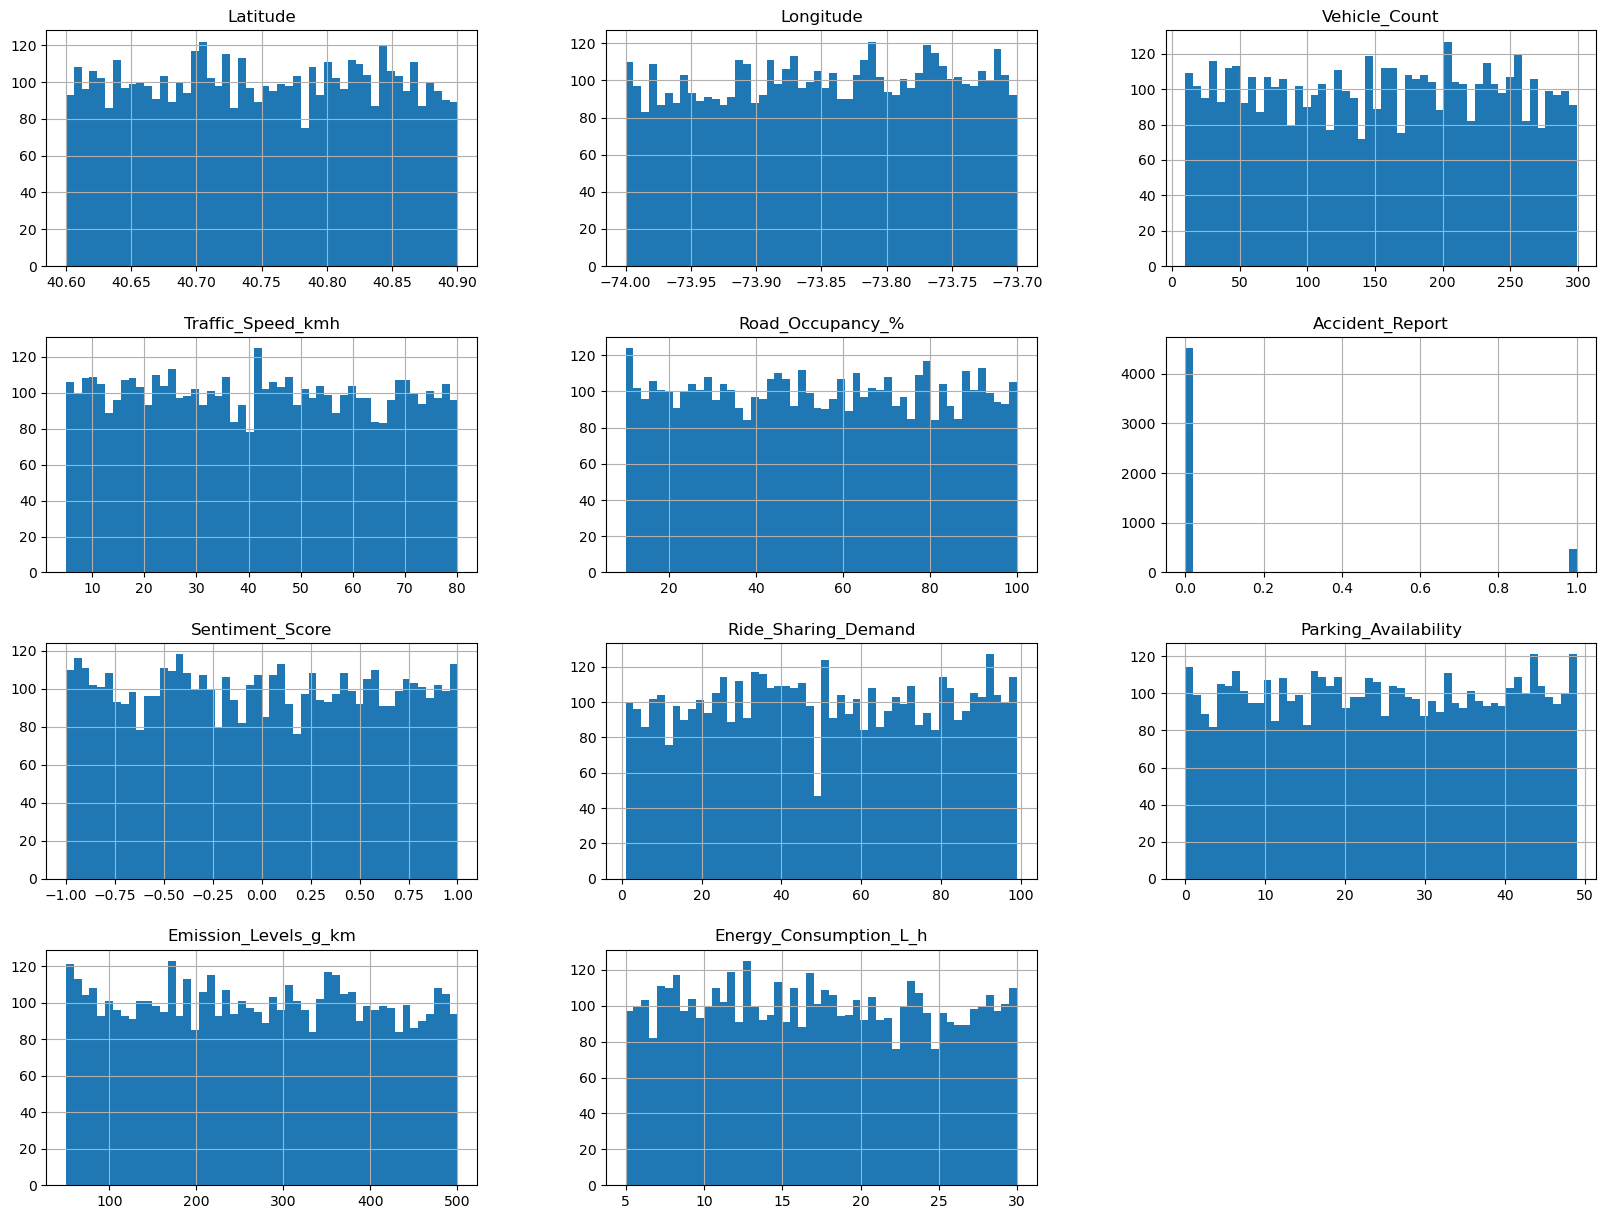

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

traffic.hist(bins=50, figsize=(20, 15))

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(traffic, test_size=0.2, random_state=42)

In [7]:
traffic = train_set.copy()

traffic["Traffic_Condition"] = traffic["Traffic_Condition"].map({"Low": 0, "Medium": 1, "High": 2})

In [8]:
corr_matrix = traffic.corr(numeric_only=True)
corr_matrix["Traffic_Condition"].sort_values(ascending=False)

#Podemos notar que a condição do tráfego está mais relacionada com o número de veiculos, a ocupação das vias
#e a velocidade do tráfego

Traffic_Condition         1.000000
Vehicle_Count             0.486546
Road_Occupancy_%          0.347783
Accident_Report           0.231233
Emission_Levels_g_km      0.020971
Sentiment_Score           0.017029
Parking_Availability      0.012847
Ride_Sharing_Demand       0.011288
Longitude                 0.010998
Latitude                 -0.001015
Energy_Consumption_L_h   -0.015635
Traffic_Speed_kmh        -0.299339
Name: Traffic_Condition, dtype: float64

array([[<AxesSubplot: xlabel='Traffic_Condition', ylabel='Traffic_Condition'>,
        <AxesSubplot: xlabel='Road_Occupancy_%', ylabel='Traffic_Condition'>,
        <AxesSubplot: xlabel='Traffic_Speed_kmh', ylabel='Traffic_Condition'>],
       [<AxesSubplot: xlabel='Traffic_Condition', ylabel='Road_Occupancy_%'>,
        <AxesSubplot: xlabel='Road_Occupancy_%', ylabel='Road_Occupancy_%'>,
        <AxesSubplot: xlabel='Traffic_Speed_kmh', ylabel='Road_Occupancy_%'>],
       [<AxesSubplot: xlabel='Traffic_Condition', ylabel='Traffic_Speed_kmh'>,
        <AxesSubplot: xlabel='Road_Occupancy_%', ylabel='Traffic_Speed_kmh'>,
        <AxesSubplot: xlabel='Traffic_Speed_kmh', ylabel='Traffic_Speed_kmh'>]],
      dtype=object)

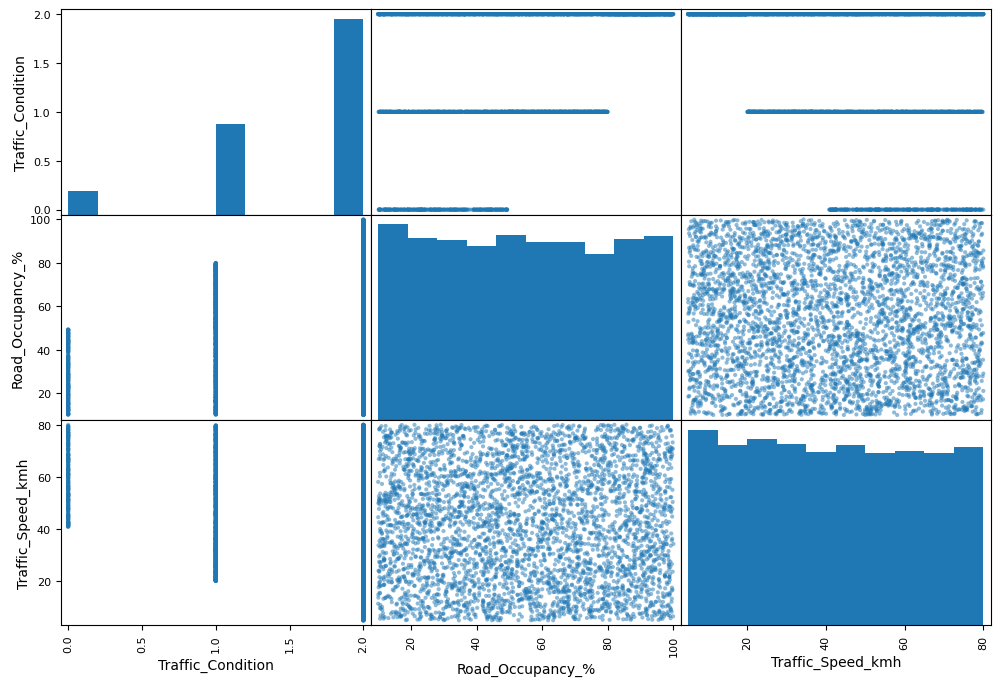

In [9]:
from pandas.plotting import scatter_matrix

#Checando com mais detalhes as relações entre esses atributos
attributes = ["Traffic_Condition", "Road_Occupancy_%", "Traffic_Speed_kmh"]
scatter_matrix(traffic[attributes], figsize=(12,8))

In [10]:
from sklearn.impute import SimpleImputer

traffic = train_set.drop("Traffic_Condition", axis=1)
traffic_labels = train_set["Traffic_Condition"].copy()

imputer = SimpleImputer(strategy="median")
traffic_num = traffic.drop(["Timestamp", "Traffic_Light_State", "Weather_Condition"], axis=1)
imputer.fit(traffic_num)
X = imputer.transform(traffic_num)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

traffic_num_tr = num_pipeline.fit_transform(traffic_num)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(traffic_num)
cat_attribs = ["Timestamp", "Traffic_Light_State", "Weather_Condition"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

traffic_prepared = full_pipeline.fit_transform(traffic)
encoder = OneHotEncoder(sparse_output=False) 
traffic_labels_encoded = encoder.fit_transform(traffic_labels.to_numpy().reshape(-1, 1))
#Esse encoder serve para transformar os labels em valores numéricos também

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(traffic_prepared, traffic_labels_encoded)

some_data = traffic.iloc[:5]
some_labels = traffic_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) #Deixa os dados do mesmo modelo
predictions = rf_reg.predict(some_data_prepared)
predictions = encoder.inverse_transform(predictions)
#Serve para desfazer a codificação, para que a resposta fique mais visível
print("Predictions: ", predictions) #Prevemos os valores e comparamos
print("Labels: ", list(some_labels))

Predictions:  [['Medium']
 ['High']
 ['High']
 ['High']
 ['Medium']]
Labels:  ['Medium', 'High', 'High', 'High', 'Medium']


In [14]:
from sklearn.metrics import accuracy_score

testData = train_set.drop("Traffic_Condition", axis=1)
testLabel = train_set["Traffic_Condition"].copy()

testDataPrepared = full_pipeline.fit_transform(testData)

predictions = rf_reg.predict(testDataPrepared)
predictions = encoder.inverse_transform(predictions)

accuracy = accuracy_score(testLabel, predictions)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 100.00%


In [15]:
print(testLabel.head(20))
print(predictions[:20])

4227    Medium
4676      High
800       High
3671      High
4193    Medium
2968    Medium
4793    Medium
4368      High
2776    Medium
2970      High
3867      High
1743      High
3948      High
3802    Medium
2024      High
2274      High
99        High
4921      High
3407    Medium
4245      High
Name: Traffic_Condition, dtype: object
[['Medium']
 ['High']
 ['High']
 ['High']
 ['Medium']
 ['Medium']
 ['Medium']
 ['High']
 ['Medium']
 ['High']
 ['High']
 ['High']
 ['High']
 ['Medium']
 ['High']
 ['High']
 ['High']
 ['High']
 ['Medium']
 ['High']]
